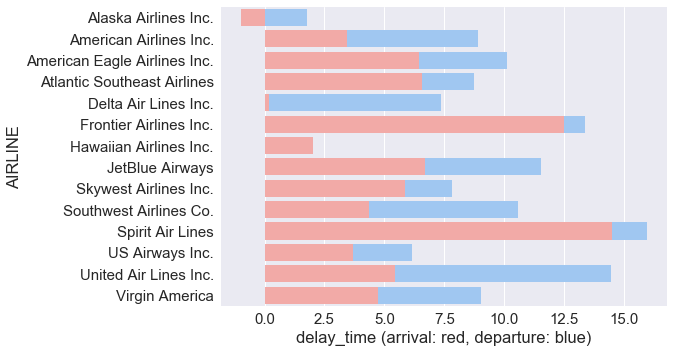

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

airlines = pd.read_csv('./input/airlines.csv')
airports= pd.read_csv('./input/airports.csv')
flights = pd.read_csv('./input/flights.csv', low_memory=False)

flights_v1 = pd.merge(flights, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
flights_v1.drop('IATA_CODE', axis=1, inplace=True)
flights_v1.rename(columns={'AIRLINE_x': 'AIRLINE_CODE','AIRLINE_y': 'AIRLINE'}, inplace=True)

# # Arrival & Departure Delays
airline_rank_v07 = pd.DataFrame({'avg_arrival_delay' : flights_v1.groupby(['AIRLINE'])
                                 ['ARRIVAL_DELAY'].mean()}).reset_index()
airline_rank_v08 = pd.DataFrame({'avg_departure_delay' : flights_v1.groupby(['AIRLINE'])
                                 ['DEPARTURE_DELAY'].mean()}).reset_index()
ax = sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
ax = sns.barplot(x="avg_departure_delay", y="AIRLINE", 
                 data=airline_rank_v08, label="accuracy", color="b")
ax = sns.barplot(x="avg_arrival_delay", y="AIRLINE", 
                 data=airline_rank_v07, label="accuracy", color="r")
ax.set(xlabel="delay_time (arrival: red, departure: blue)")

plt.show()